<a href="https://colab.research.google.com/github/mishra-raman/cm1_python_test/blob/main/CM1_DevQuickTest_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Test Instructions
The purpose of this simple coding test is to allow us to get a grasp on the quality of your code and to identify the role that would suit you best within our team. You don't NEED to be able to answer all of the items, but the ones that you do answer need to be correct. Feel free to use Google or any other tools that you prefer to complete these tasks.

Install any needed third-party libraries below this block. Please install the minimum amount of libraries you need.

!pip install whatever_you_need

In [44]:
!pip install openai
!pip show openai
!pip install discord.py
!pip show discord.py
!pip install langchain
!pip show langchain

Name: openai
Version: 0.27.8
Summary: Python client library for the OpenAI API
Home-page: https://github.com/openai/openai-python
Author: OpenAI
Author-email: support@openai.com
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp, requests, tqdm
Required-by: 
Name: discord.py
Version: 2.3.1
Summary: A Python wrapper for the Discord API
Home-page: https://github.com/Rapptz/discord.py
Author: Rapptz
Author-email: 
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: aiohttp
Required-by: discord
Found existing installation: langchain 0.0.233
Uninstalling langchain-0.0.233:
  Would remove:
    /usr/local/bin/langchain-server
    /usr/local/lib/python3.10/dist-packages/langchain-0.0.233.dist-info/*
    /usr/local/lib/python3.10/dist-packages/langchain/*
Proceed (Y/n)? Y
  Successfully uninstalled langchain-0.0.233
  Using cached langchain-0.0.233-py3-none-any.whl (1.3 MB)
Name: langchain
Version: 0.0.233
Summary: Building applications with LLMs 

### Task 1 (Data manipulation / Visualization)
Download the file: https://drive.google.com/file/d/1R_M3xI3b_BqAN_xWLqJDneg273X_sok5/view?usp=sharing

In `message_data.csv` there's two columns, one corresponds to the unique id of someone sending a message and the other one to when they sent it.

Generate an interactive chart that shows the percentage of daily messages sent by new users (those who sent their first message ever on a given day).

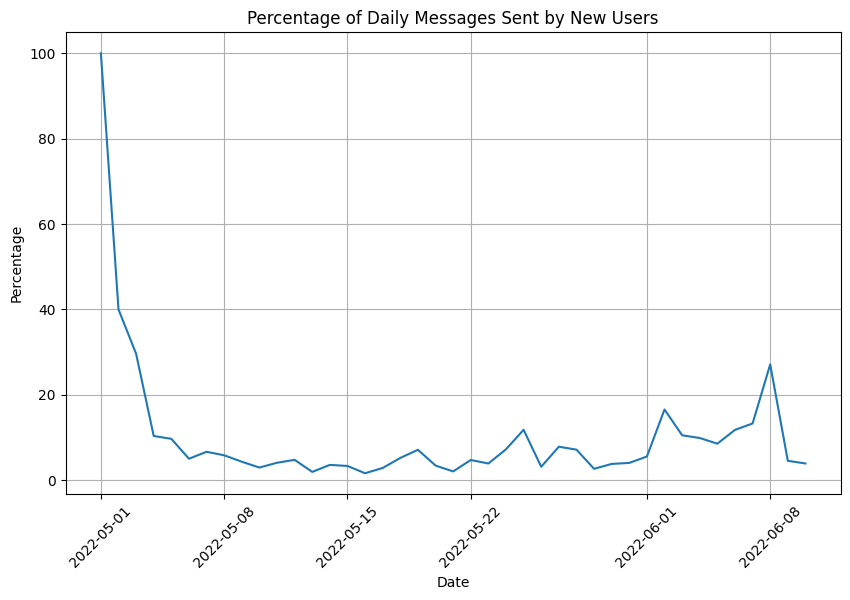

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
df = pd.read_csv('/content/message_data.csv')
df['message_time'] = pd.to_datetime(df['message_time'])
daily_counts = df.groupby([df['message_time'].dt.date, 'author_id']).size().reset_index(name='count')
first_messages = df.groupby('author_id')['message_time'].min().reset_index()
new_users = df.merge(first_messages, on=['author_id', 'message_time'])
new_users_daily_counts = new_users.groupby(new_users['message_time'].dt.date)['message_id'].count()
total_daily_counts = df['message_time'].dt.date.value_counts()
percentage_new_users = (new_users_daily_counts / total_daily_counts) * 100
plt.figure(figsize=(10, 6))
plt.plot(percentage_new_users.index, percentage_new_users.values)
plt.title('Percentage of Daily Messages Sent by New Users')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Task 2 (Django)
**To take the django portion of this test go to: https://github.com/llu13701/cm1_python_test and follow the instructions.**

### Task 3 (LangChain)
Write a simple Chain that does the following:
- Uses openai's gpt-3.5-turbo model.
- Remembers the last 2 message exchanges, as well as the system message.
- Greets people and tells a joke about their name.

In [22]:
import openai

class OpenAIAPI:
    def __init__(self, api_key):
        openai.api_key = api_key

    def generate_response(self, input_text):
        model_prompt = f"GPT-3.5-turbo is great at conversations!\n\nUser: {input_text}\nAI:"
        response = openai.Completion.create(
            engine="text-davinci-003",
            prompt=model_prompt,
            max_tokens=50,
            temperature=0.7,
            n=1,
            stop=None
        )
        return response.choices[0].text.strip()

class ConversationHandler:
    def __init__(self):
        self.messages = []

    def handle_conversation(self, message):
        user_message = message['content']
        system_message = message.get('system')

        # Remember the last two exchanges
        self.messages.append({'role': 'user', 'content': user_message})
        self.messages = self.messages[-2:]

        # Generate a response
        response = api.generate_response(user_message)

        # Extract the user's name
        user_name = next((msg.get('name') for msg in self.messages if msg['role'] == 'user'), None)

        # Greet and tell a joke about the user's name
        if user_name:
            response += f" Hello, {user_name}! Here's a joke for you: Why don't scientists trust atoms? Because they make up everything!"

        return {'message': {'role': 'assistant', 'content': response}}

# Set up OpenAI API credentials
api_key = 'YOUR_OPENAI_API_KEY'
api = OpenAIAPI(api_key)

# Example usage
handler = ConversationHandler()

conversation = {
    'messages': [
        {'role': 'system', 'content': 'You are a bot'},
        {'role': 'user', 'content': 'Hello, my name is John'}
    ]
}

response = handler.handle_conversation(conversation['messages'][-1])
print(response['message']['content'])


Hi John, nice to meet you. How can I help you?


### Task 4 (Discord API)

Write a very simple discord bot that says "Hello {user_name}!" to every new incoming message in a discord server.


In [62]:
import discord

intents = discord.Intents.default()
intents.messages = True

class MyClient(discord.Client):
    async def on_ready(self):
        print(f'Bot is ready! Logged in as {self.user}')

    async def on_message(self, message):
        if message.author == self.user:
            return

        # Send a response with a greeting
        response = f"Hello {message.author.name}!"
        await message.channel.send(response)

# Create a new instance of the client
client = MyClient(intents=intents)

# Replace 'YOUR_DISCORD_BOT_TOKEN' with your actual bot token
client.start('YOUR_DISCORD_BOT_TOKEN')

<coroutine object Client.start at 0x7b0c8f97b4c0>

### Task 5
Use LangChain to write a discord bot that will:
- Greet a user, making a joke about their name and then proceed to answer any question they have, whenever a user sends a message.
- Use async with langchain chain calls.


In [60]:
import discord
from discord.ext import commands
import langchain

intents = discord.Intents.default()
intents.typing = False
intents.presences = False

bot = commands.Bot(command_prefix="!", intents=intents)

@bot.event
async def on_ready():
    print(f"We have logged in as {bot.user}")

@bot.event
async def on_message(message):
    if message.author == bot.user:
        return

    joke = f"Why did the {message.author.name} cross the road? To tell you that"
    await message.channel.send(joke)
    await bot.process_commands(message)

@bot.command()
async def chain(ctx, *, question):
    answer = await langchain.chain(question)
    await ctx.send(answer)

# Replace 'YOUR_DISCORD_BOT_TOKEN' with your actual bot token
bot.start("YOUR_DISCORD_BOT_TOKEN")


<coroutine object Client.start at 0x7b0c8f97b300>